In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import pathlib
from matplotlib import pyplot as plt
import PIL.Image as Image

In [3]:
#URl for the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
#downloading the dataset
data_dir = tf.keras.utils.get_file('flower_photos', cache_dir = '.', origin = dataset_url, untar = True)

In [5]:
#file path of the dataset
data_dir

'.\\datasets\\flower_photos'

In [6]:
#changing the file path to a windows directory
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
#getting the number of all the images using glob
data_size = len(list(data_dir.glob('*/*.jpg')))
data_size

3670

In [8]:
#getting all image paths with the word 'roses' in it
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

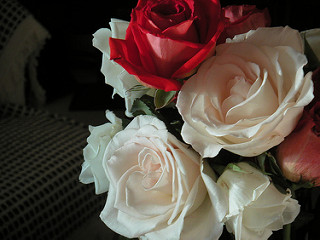

In [9]:
#displaying an image of a rose flower
Image.open(str(roses[1]))

In [10]:
#creating a dictionary to store the image directories with their respective keys
flowers_img_dict = {
     'roses' : list(data_dir.glob('roses/*')),
     'daisy' : list(data_dir.glob('daisy/*')),
     'dandelion' : list(data_dir.glob('dandelion/*')),
     'sunflower' : list(data_dir.glob('sunflower/*')),
     'tulips' : list(data_dir.glob('tulips/*'))
 }

In [11]:
#creating a dictionary to assign the labels to each flower class
flower_labels = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4
}

In [12]:
cv2.imread(str(flowers_img_dict['roses'][1])).shape

(240, 320, 3)

In [14]:
x, y = [], []

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        
        x.append(resized_img)
        y.append(flower_labels[flower_name])

In [15]:
y[2000:2005]

[2, 2, 2, 2, 2]

In [16]:
x = np.array(x)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y,random_state=40, test_size=0.25)

In [31]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

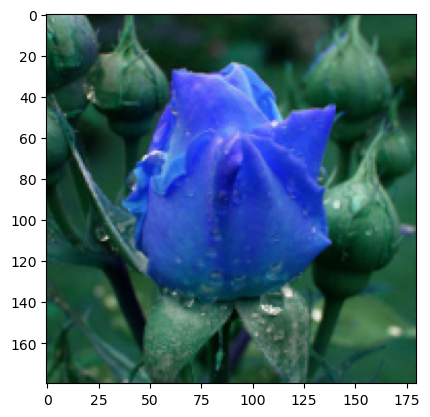

In [33]:
plt.imshow(x_train[1])

In [47]:
#creating a data augmentation function
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.9),
    keras.layers.experimental.preprocessing.RandomContrast(1),
    keras.layers.experimental.preprocessing.RandomFlip(),
    
])

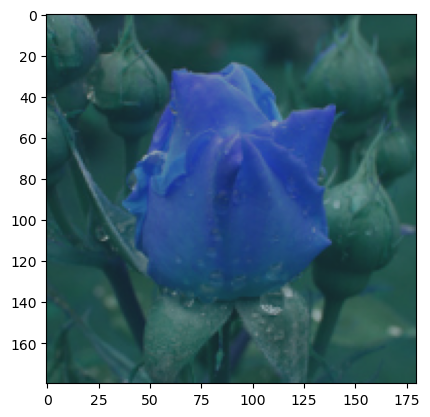

In [48]:
plt.imshow(data_augmentation(x_train[1]).numpy().astype('uint8'))

In [38]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=48, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs = 10)